In [1]:
### 훈련데이터와 테스트 데이터 분리하기
# - 수집한 데이터 : 데이터세트라고 칭합니다.
# - 훈련에 사용되는 데이터 : 훈련데이터세트
# - 예측에 사용되는 데이터 : 테스트 데이터세트

### 훈련데이터와 테스트데이터로 분리하는 방법
# - 훈련데이터와 테스트데이터를 따로 준비
# - 데이터세트를 특정 비율 또는 갯수로 나누어서 준비

In [ ]:
### [문제]
# 도미와 빙어 데이터세트를 이용하여
# - 각각에 대한 정답데이터 생성
# - 하나의 2차원 데이터 생성

# - 훈련데이터와 테스트데이터 생성하기
# - 훈련데이터 변수 : train_input, train_target
# - 테스트데이터 변수 : test_input, test_target

# 훈련데이터 35개, 테스트데이터 14개로 분리해서
# - 객체생성 > 훈련데이터 학습 > 정확도 평가하기

In [5]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

# - 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# - 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# - 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
# 도미와 빙어의 길이 데이터 합치기
length = bream_length + smelt_length
# 도미와 빙어의 무게 데이터 합치기
weight = bream_weight + smelt_weight

In [7]:
# 2차원 데이터 생성
fish_data = [[len, we] for len, we in zip(length,weight) ]

In [8]:
# 정답데이터 생성
fish_target = [1]*35 + [0]*14

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# - 훈련데이터 변수 : train_input, train_target
# - 테스트데이터 변수 : test_input, test_target

# 훈련데이터 35개, 테스트데이터 14개로 분리해서
#fit(train_input,train_target)
train_input = fish_data[0:35]
train_target = fish_target[0:35]

#score(test_input, test_target)
test_input = fish_data[35:]
test_target = fish_target[35:]

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)
## score
# 1. predict() 함수를 호출 : 예측 수행 (예측 정답갯수반환)
# 2. 자체적으로 정확도 계산 = 예측 정답 갯수 / test_target의 전체갯수
# 3. 정확도 반환(return)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.0

### <샘플링 편향>
##### - 특정 데이터가 몰려있는 부분으로만 훈련이 이루어진 경우
##### - 샘플링 편향을 해결하기 위해서는 훈련 및 테스트 생성 시 위 아래 데이터들이 잘 섞일 수 있도록 해주어야 함.

In [20]:
import numpy as np

In [25]:
input_arr = np.array(fish_data)
target_arr =np.array(fish_target)

# 넘파이 배열에서는 차원 확인이 가능
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


In [26]:
### 넘파이 shuffle() 함수를 이요해서 배열(리스트) 데이터 섞기

np.random.seed(42)
# 0~48까지의 순차적인 번호 생성하기
index = np.arange(49)
print('(섞기 전)index = ', index)
print('---------------------------')

# 0~48까지의 순차적인 번호를 섞기
# 아직 데이터는 그대로
np.random.shuffle(index)
print('(섞은 후)index = ', index)


(섞기 전)index =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
---------------------------
(섞은 후)index =  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [30]:
## 훈련데이터 생성하기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(train_input)
print('------------------------')
print(train_target)


[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
------------------------
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [31]:
## 테스트데이터 생성하기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(test_input)
print('------------------------')
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
------------------------
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


Text(0, 0.5, 'weigth')

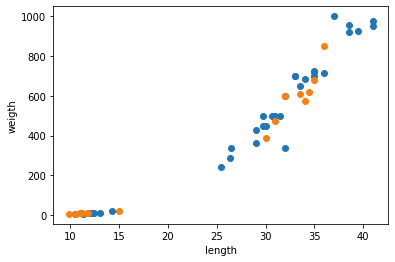

In [35]:
### 데이터의 특징간의 분포 확인하기
import matplotlib.pyplot as plt

# 산점도로 표현하기 (scatter(x, y))
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])

plt.xlabel('length')
plt.ylabel('weigth')

In [36]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [37]:
kn.predict(test_input)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])